# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')
df.head()


person_age person_gender person_education  person_income  person_emp_exp  \
0          71          male        Associate   46817.176426               3   
1          34          male      High School   79093.494008              17   
2          80          male        Associate   67819.614431              20   
3          40        female        Associate   49599.861220               0   
4          43          male        Doctorate   99833.900180               8   

  person_home_ownership     loan_amnt loan_intent  loan_int_rate  \
0                  RENT  11567.737650     MEDICAL      10.351469   
1                   OWN   9519.674498     MEDICAL      11.168902   
2                   OWN  16226.604002    PERSONAL      12.293112   
3                  RENT  15641.221708     VENTURE      10.327926   
4                   OWN  12727.942517   EDUCATION       9.338069   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             0.247083                           5    806.869094   
1             0.120360                           1    604.330171   
2             0.239261                          11    685.933579   
3             0.315348                          14    629.190150   
4             0.127491                          16    638.298168   

  previous_loan_defaults_on_file  loan_status  
0                             No            0  
1                             No            0  
2                             No            0  
3                             No            0  
4                             No            1

In [31]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

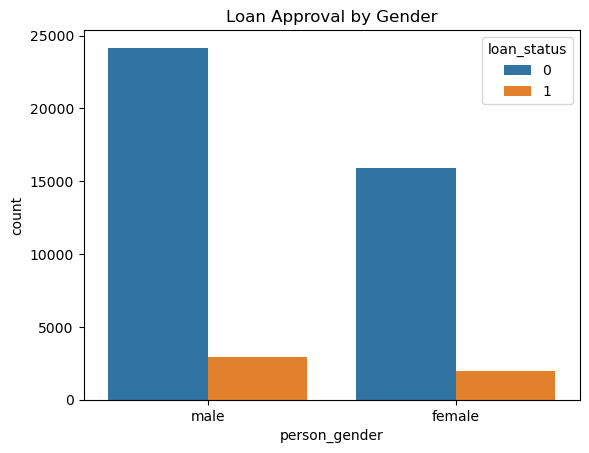

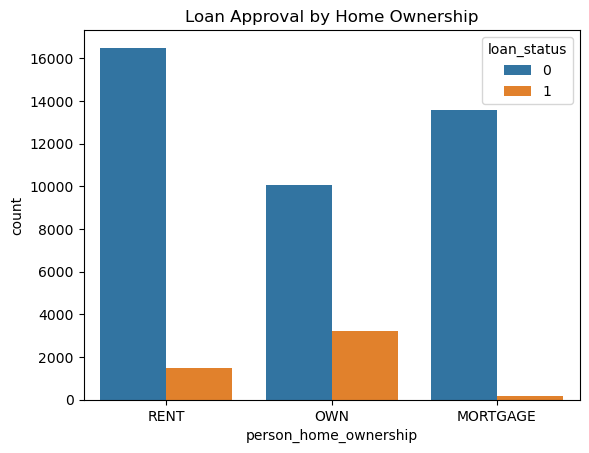

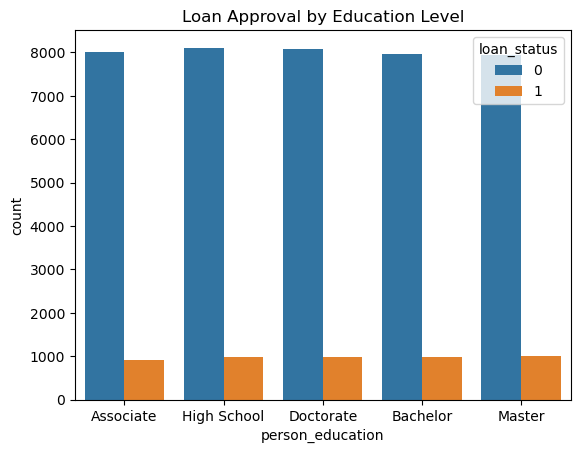

In [32]:
sns.countplot(x='person_gender', hue='loan_status', data=df)
plt.title('Loan Approval by Gender')
plt.show()

sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Loan Approval by Home Ownership')
plt.show()

sns.countplot(x='person_education', hue='loan_status', data=df)
plt.title('Loan Approval by Education Level')
plt.show()


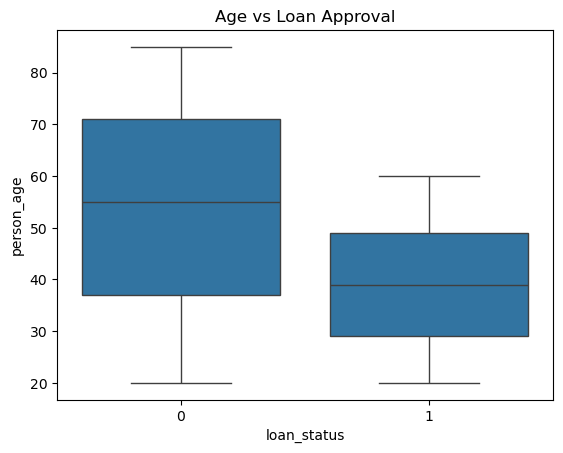

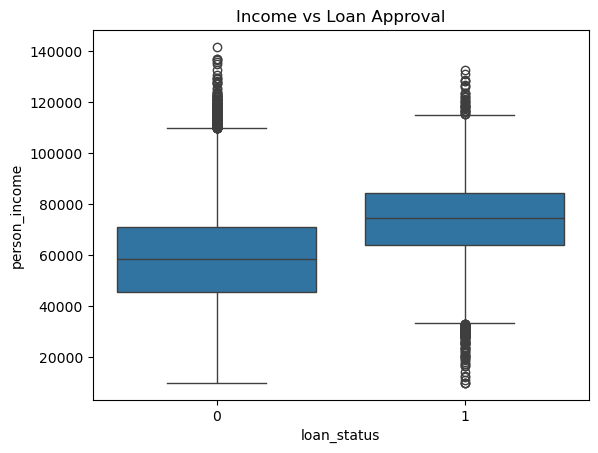

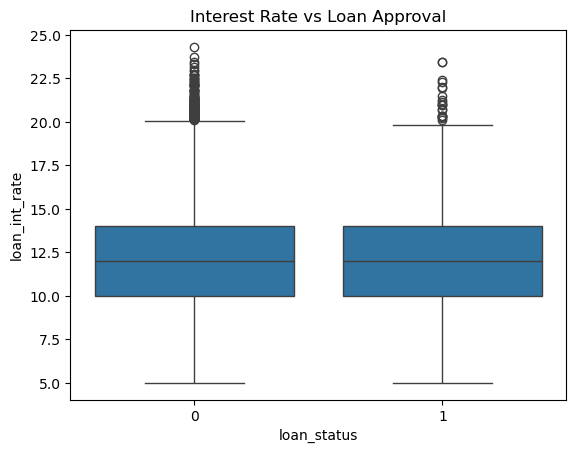

In [33]:
sns.boxplot(x='loan_status', y='person_age', data=df)
plt.title('Age vs Loan Approval')
plt.show()

sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Income vs Loan Approval')
plt.show()

sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Interest Rate vs Loan Approval')
plt.show()


In [34]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)


loan_status                   1.000000
person_income                 0.235032
credit_score                  0.149459
cb_person_cred_hist_length    0.121588
person_emp_exp                0.007496
loan_int_rate                 0.000773
loan_amnt                    -0.095025
loan_percent_income          -0.169636
person_age                   -0.237128
Name: loan_status, dtype: float64

In [49]:
def rate_bar(df, cat):
    tmp = (
        df.groupby(cat)['loan_status']
          .mean()
          .reset_index()
          .rename(columns={'loan_status':'approval_rate'})
    )
    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=cat, y='approval_rate', data=tmp)
    ax.set_ylabel('Approval Rate')
    ax.set_ylim(0, 1)
    ax.set_title(f'Approval Rate by {cat}', fontsize=12, weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.tight_layout()
    plt.show()



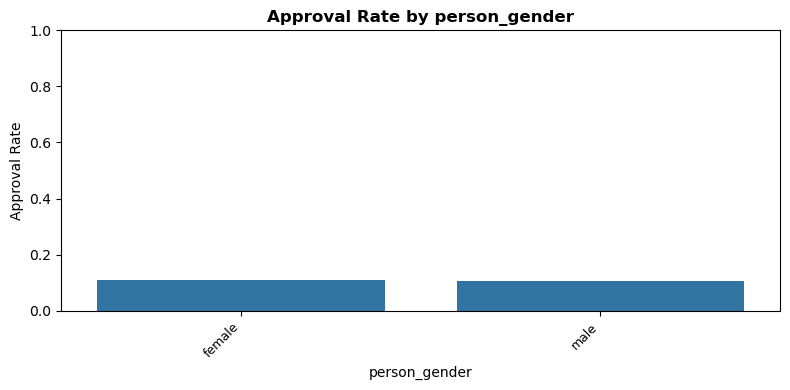

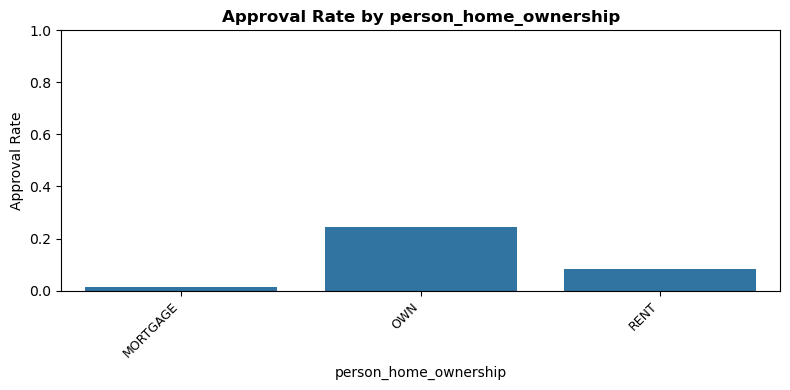

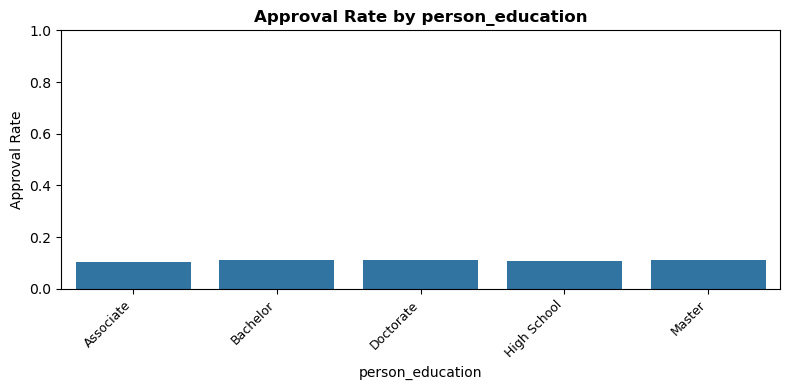

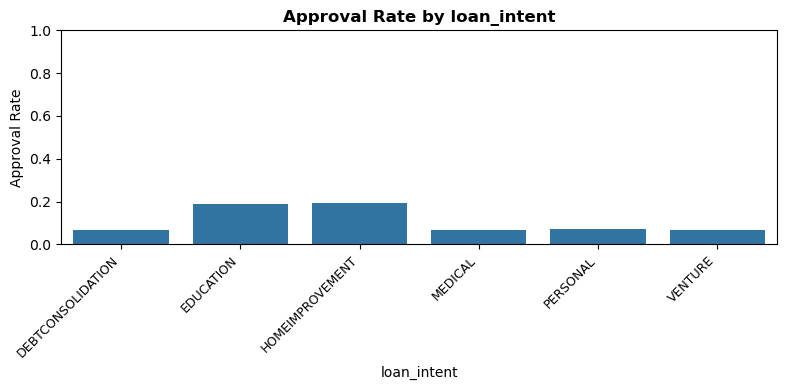

In [51]:
# render approval-rate charts
for col in ['person_gender','person_home_ownership','person_education','loan_intent']:
    rate_bar(df, col)


C:\Users\15733\AppData\Local\Temp\ipykernel_6648\475971823.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(cat)['loan_status']


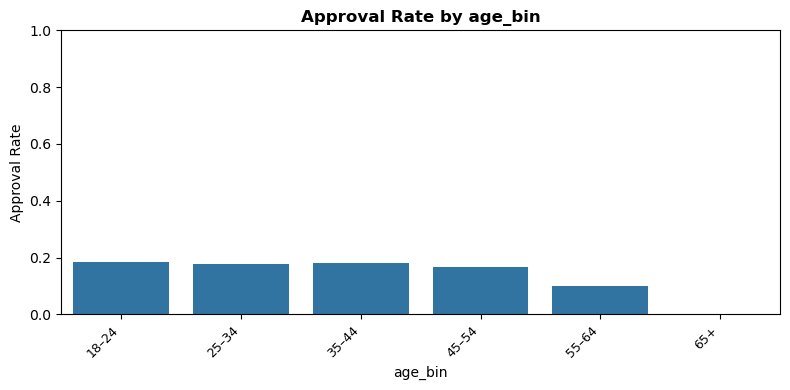

In [36]:
age_bins   = [18,25,35,45,55,65,100]
age_labels = ['18–24','25–34','35–44','45–54','55–64','65+']
df['age_bin'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels, right=False)

rate_bar(df, 'age_bin')


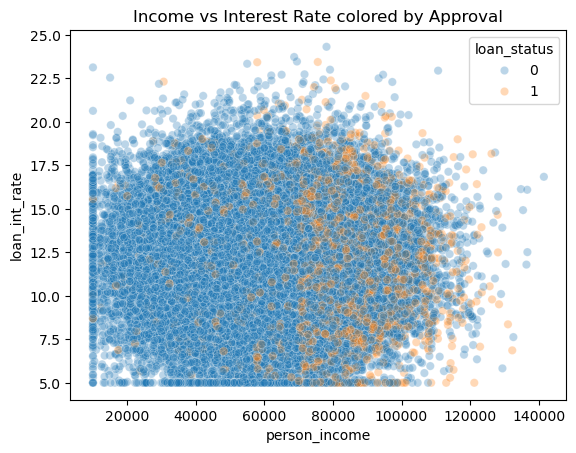

In [37]:
sns.scatterplot(data=df, x='person_income', y='loan_int_rate', hue='loan_status', alpha=0.3)
plt.title('Income vs Interest Rate colored by Approval')
plt.show()


===========================================================================================================

                                                               Summary

From the visualizations, we can see that income and interest rate have the strongest relationship with loan approval — higher income and lower interest rates are associated with approval.

Gender appears to have little impact, suggesting the model may not be directly biased by sex.

Age shows some correlation — younger applicants have a slightly higher rejection rate — which could raise fairness concerns under lending laws.

Overall, financial institutions should review their model’s decision criteria to ensure age-related patterns are not legally discriminatory.